## Opis Problemu
- Choroby serca są częstą przyczyną zgonów, stąd wczesne wykrywanie lub określenie szans na nie odbywa kluczową role w zmianie nawyków bądź szybszym wprowadzeniu leczenia i przedłużenia życia osób chorych.  Model taki pozwoliłby na szybkie i precyzyjne wskazanie pacjentów z podwyższonym ryzykiem. 
- Z modelu mogą korzystać zarówno lekarze w diagnostyce jak i pacjenci w celu sprawdzenia czy znajdują się w grupie ryzyka podając swoje dane. 
- Problem z pewnością jest interesujący, ponieważ pozwala zastosować nowoczesne technologie w dziedzinie medycyny ratując przy tym ludzkie życia. 

## Dane

#### Źródło danych
Dane zostały zaczerpnięte z publicznego zbioru **Heart Disease Dataset**, który jest dostępny w repozytorium UCI Machine Learning Repository. Zbiór danych jest połączeniem kilku renomowanych baz danych:
- Cleveland
- Hungarian
- Switzerland
- Long Beach VA

Dane te zostały zebrane w ramach badań nad chorobami serca przez uznane instytucje medyczne i są powszechnie używane w literaturze naukowej jako punkt odniesienia w analizach predykcyjnych chorób serca.

### Cechy danych

- **Age**: Wiek pacjenta (w latach).
- **Sex**: Płeć pacjenta  
  - `M`: Mężczyzna  
  - `F`: Kobieta
- **ChestPainType**: Typ bólu w klatce piersiowej  
  - `TA`: Typowy ból wieńcowy (Typical Angina)  
  - `ATA`: Nietypowy ból wieńcowy (Atypical Angina)  
  - `NAP`: Ból niewieńcowy (Non-Anginal Pain)  
  - `ASY`: Bezobjawowy (Asymptomatic)
- **RestingBP**: Ciśnienie tętnicze krwi w spoczynku (w mm Hg).
- **Cholesterol**: Poziom cholesterolu we krwi (w mg/dl).
- **FastingBS**: Cukier na czczo  
  - `1`: jeśli poziom > 120 mg/dl  
  - `0`: w przeciwnym razie
- **RestingECG**: Wyniki elektrokardiograficzne w spoczynku  
  - `Normal`: Prawidłowe  
  - `ST`: Nieprawidłowości ST-T (np. odwrócenie fali T, podwyższenie ST)  
  - `LVH`: Przerost lewej komory serca zgodnie z kryteriami Estes’a
- **MaxHR**: Maksymalne osiągnięte tętno (od 60 do 202).
- **ExerciseAngina**: Wystąpienie bólu w klatce piersiowej podczas wysiłku  
  - `Y`: Tak  
  - `N`: Nie
- **Oldpeak**: Depresja odcinka ST (różnica między wartością w spoczynku a podczas wysiłku).
- **ST_Slope**: Nachylenie odcinka ST  
  - `Up`: Wznoszące  
  - `Flat`: Płaskie  
  - `Down`: Opadające
- **HeartDisease**: Zmienna celu  
  - `1`: Występowanie choroby serca  
  - `0`: Brak choroby serca

Dane zawierają odpowiednie cechy pozwalające ustalić potencjalną chorobę serca na ich podstawie można zbudować model predykcyjny, który zidentyfikuje zagrożone osoby.


### Krótki opis wybranego modelu

- Wybrany został model `Sequential`, ponieważ pozwala na szybkie i intuicyjne modelowanie zależności między cechami a zmienną celu.
- Zostały zastosowane wastwy ukryte z funkcją aktywacji `relu` oraz metodę **dropout** w celu zmniejszenia ryzyka przeuczenia.
- Warstwa wyjściowa wykorzystuje funkcji aktywacji `sigmoid`.
- Została użyta funkcja straty `binary_crossentropy`, ponieważ problem dotyczy klasyfikacji binarnej

### Realizacja

##### 1. Wczytanie i podstawowy podgląd danych
- Dane zostały wczytane z pliku CSV zawierającego 918 obserwacji i 11 cech.
- Przy użyciu metod takich jak `data.describe()`, `data.head()` i `data.info()` sprawdzono podstawowe statystyki opisowe.

##### 2. Rozkład zmiennej celu (`HeartDisease`)
- Zmienna `HeartDisease` została przeanalizowana pod kątem jej rozkładu. Wykres pokazał procentowy udział przypadków chorób serca (`1`) w porównaniu do braku chorób (`0`).

##### 3. Wykrywanie zmiennych odstających
- Zamiast usuwania wartości odstających, zostały one zastąpione medianą.

##### 4. Sprawdzenie brakujących wartości

##### 5. Macierz korelacji
- Macierz korelacji dla zmiennych numerycznych, aby zaobserwować zależności między cechami a zmienną celu.

##### 6. Kodowanie zmiennych kategorycznych
- Zmieniono zmienne kategoryczne na postać numeryczną za pomocą kodowania one-hot (`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`).

##### 7. Podział na zbiór treningowy i testowy
- Dane zostały podzielone na zbiór treningowy i testowy(80% dane treningowe, 20% dane testowe).

##### 8. Standaryzacja danych

##### 9. Budowa modelu sieci neuronowej
- pierwsza warstwa z 64 wejściami i funkcją aktywacji `relu`
- druga warstwa z 128 wejściami i funkcją aktywacji `relu`
- dropout
- trzecia warstwa z 128 wejściami i funkcją aktywacji `relu`
- czwarta warstwa z 64 wejściami i funkcją aktywacji `relu`
- warstwa wyjściowa z funkcją aktywacji `sigmoid`

##### 10. Trenowanie modelu

##### 11. Wyniki
- Wyniki modelu oceniono na zbiorze testowym pod kątem `Accuracy`, `Precision`, `Recall`, `F1-score`.
- Została przedstawiona macierz pomyłek oraz historia dokładności.

### Wyniki modelowania

#### Wyniki z 5 uruchomień:
|     | Loss   | Accuracy |
|-----|--------|----------|
| 1   | 0.4129 | 0.8804   |
| 2   | 0.3362 | 0.8859   |
| 3   | 0.3337 | 0.8641   |
| 4   | 0.3564 | 0.8641   |
| 5   | 0.3654 | 0.8641   |

#### Wnioski
- Model osiągnął `Accuracy` na średnio poziomie ok. 0.87 oraz `Loss` 0.35

#### Macierz pomyłek dla pojedynczego uruchomienia
- True Positives: 94 – model poprawnie wykrył 94 przypadki choroby serca.
- True Negatives: 67 – model poprawnie rozpoznał 67 przypadków bez choroby.
- False Positives: 10 – model błędnie zaklasyfikował 10 przypadków jako chorobę serca, choć jej nie było.
- False Negatives: 13 – model przeoczył 13 przypadków choroby serca.


### Podsumowanie
Celem projektu było zbudowanie modelu, który rozpoznaje przypadki chorób serca na podstawie wybranych cech, co zostało zrealizowane z około 87% skutecznością. Model może wspierać lekarzy w diagnostyce oraz pacjentów w ocenie ryzyka wystąpienia choroby. Ograniczeniem jest stosunkowo niewielki zbiór wejściowy, który może prowadzić do przeoczenia niektórych przypadków. Rozszerzenie zbioru oraz wprowadzenie bardziej szczegółowych cech mogłoby znacząco poprawić skuteczność modelu i zmniejszenie ilości pomyłek.

#### Wczytanie danych

In [795]:
import pandas as pd

data = pd.read_csv('heart.csv')

data.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Początkowe wiersze danych

In [796]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [797]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Procentowy rozkład zmiennej celu

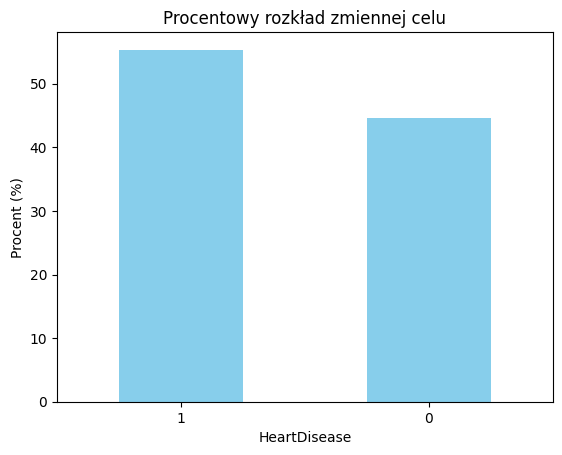

In [798]:
import matplotlib.pyplot as plt

(data['HeartDisease'].value_counts(normalize=True) * 100).plot(kind='bar', color='skyblue')

plt.title('Procentowy rozkład zmiennej celu')
plt.xlabel('HeartDisease')
plt.ylabel('Procent (%)')
plt.xticks(rotation=0) 
plt.show()


#### Wartości odstające

In [799]:
import numpy as np

numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# wartości odstające przed usunięciem
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Kolumna {col}:")
    print(f"  Odstające wartości: {len(outliers)}")
    print(f"  Dolna granica: {lower_bound}, Górna granica: {upper_bound}")

Kolumna Age:
  Odstające wartości: 0
  Dolna granica: 27.5, Górna granica: 79.5
Kolumna RestingBP:
  Odstające wartości: 28
  Dolna granica: 90.0, Górna granica: 170.0
Kolumna Cholesterol:
  Odstające wartości: 183
  Dolna granica: 32.625, Górna granica: 407.625
Kolumna MaxHR:
  Odstające wartości: 2
  Dolna granica: 66.0, Górna granica: 210.0
Kolumna Oldpeak:
  Odstające wartości: 16
  Dolna granica: -2.25, Górna granica: 3.75


#### Zastąpienie wartości odstających medianą

In [800]:

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = np.where(data[col] < lower_bound, median, data[col])
    data[col] = np.where(data[col] > upper_bound, median, data[col])


#### Sprawdzenie brakujących wartości

In [801]:
missing = pd.concat([data.isnull().sum()], axis=1, keys=['Total'])
missing

,Total
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


#### Macierz korelacji


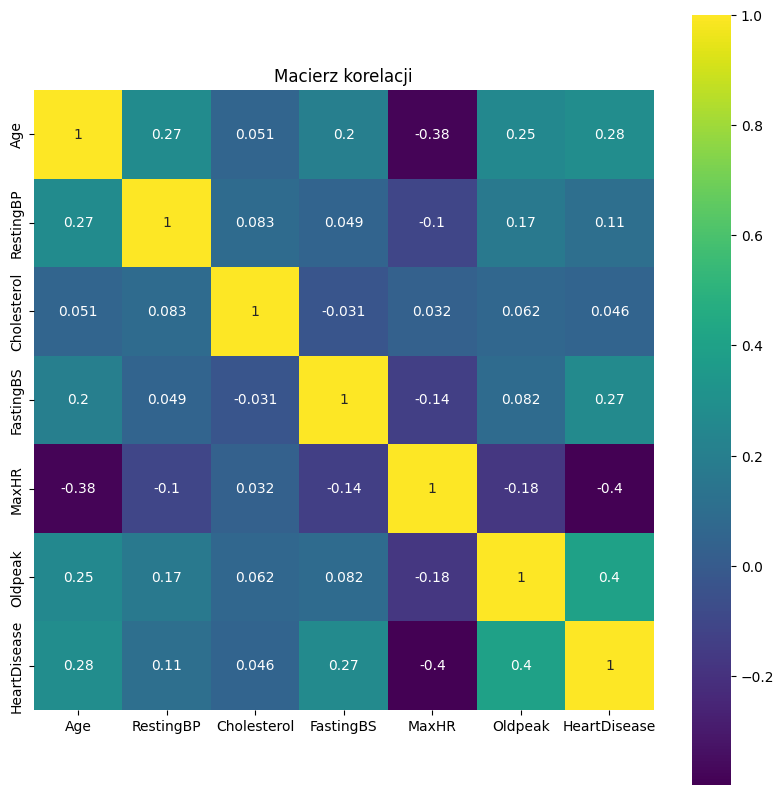

In [802]:
import seaborn as sns

corr = data.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Macierz korelacji')
plt.show()


#### Zależność wieku od chorób serca

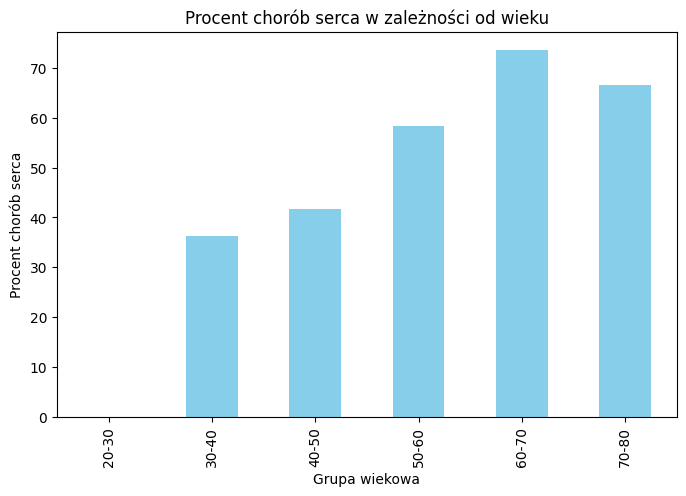

In [803]:
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
age_heart_disease = data.groupby(age_groups, observed=False)['HeartDisease'].mean() * 100
age_heart_disease.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Procent chorób serca w zależności od wieku')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Procent chorób serca')
plt.show()

#### Zależność poziomu Cholesterolu od chorób serca


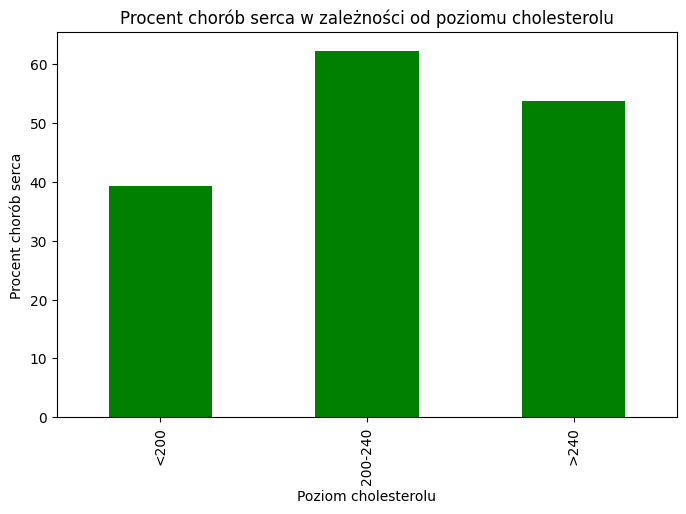

In [804]:
cholesterol_groups = pd.cut(data['Cholesterol'], bins=[0, 200, 240, 600], labels=['<200', '200-240', '>240'])
cholesterol_heart_disease = data.groupby(cholesterol_groups, observed=False)['HeartDisease'].mean() * 100
cholesterol_heart_disease.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Procent chorób serca w zależności od poziomu cholesterolu')
plt.xlabel('Poziom cholesterolu')
plt.ylabel('Procent chorób serca')
plt.show()

#### Podział danych na testowe i treningowe



In [805]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Standaryzacja danych


In [806]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Rozmiar X_train:", X_train.shape)
print("Rozmiar X_test:", X_test.shape)
print("Rozmiar y_train:", y_train.shape)
print("Rozmiar y_test:", y_test.shape)



Rozmiar X_train: (734, 15)
Rozmiar X_test: (184, 15)
Rozmiar y_train: (734,)
Rozmiar y_test: (184,)


#### Utworzenie modelu

In [807]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)


#### Trenowanie i wyniki


In [808]:
history = model.fit(
    X_train, y_train, 
    epochs=6,         
    batch_size=16,     
    validation_split=0.2  
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7178 - loss: 0.6031 - val_accuracy: 0.8299 - val_loss: 0.4385
Epoch 2/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3505 - val_accuracy: 0.8571 - val_loss: 0.4085
Epoch 3/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8908 - loss: 0.2969 - val_accuracy: 0.8163 - val_loss: 0.4488
Epoch 4/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 0.3011 - val_accuracy: 0.8163 - val_loss: 0.4381
Epoch 5/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3198 - val_accuracy: 0.8231 - val_loss: 0.4241
Epoch 6/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.2794 - val_accuracy: 0.8231 - val_loss: 0.4515
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8551 - loss: 0.3462 
Loss: 0.3197
Accuracy: 0.8641


In [809]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



#### Macierz pomyłek

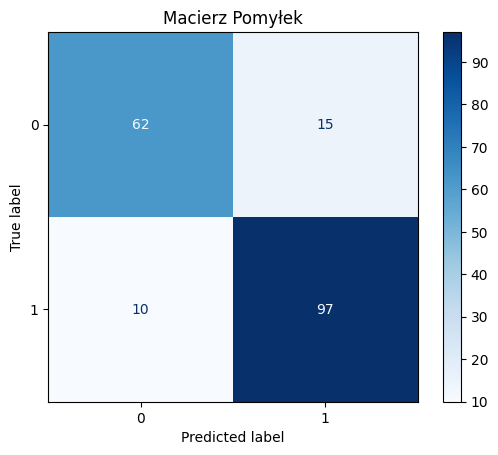

In [810]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')  
plt.title("Macierz Pomyłek")
plt.show()


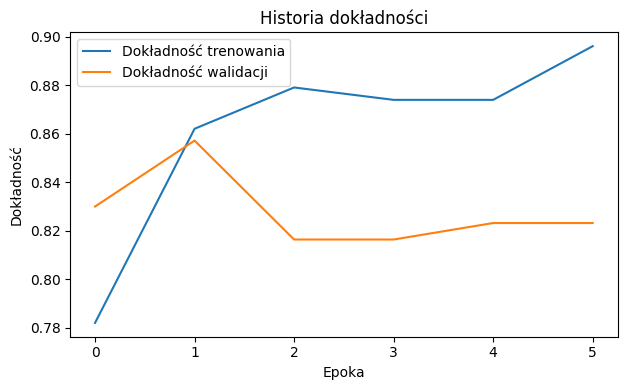

In [811]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność trenowania')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.title('Historia dokładności')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.tight_layout()
plt.show()
